In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
data=pd.read_csv('model/final.csv')

In [190]:
data


,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,UseOfLoan,...,LogInterest,LogMonthlyPayment,LogIncomeTotal,LogExistingLiabilities,LogRefinanceLiabilities,LogFreeCash,LogInterestAndPenaltyPaymentsMade,LogPreviousEarlyRepaymentsCountBeforeLoan,LogRate,Default
0,True,2.0,0,61,1.0,319.5582,115.0408,30.00,12,0,...,3.433987,4.626247,9.259226,0.000000,0.000000,0.000000,3.064428,0.0,inf,0
1,False,2.0,0,48,1.0,191.7349,140.6057,25.00,1,0,...,3.258097,4.626247,9.287394,0.000000,0.000000,0.000000,1.106150,0.0,inf,0
2,True,2.0,0,58,1.0,319.5582,319.5409,25.00,20,1,...,3.258097,4.626247,8.853808,0.000000,0.000000,0.000000,4.106974,0.0,0.729645,1
3,True,2.0,0,23,1.0,127.8233,57.5205,45.00,15,2,...,3.828641,4.626247,9.358847,0.000000,0.000000,0.000000,2.982257,0.0,inf,0
4,True,2.0,0,25,1.0,319.5582,319.5436,30.00,12,3,...,3.433987,4.626247,8.824825,0.000000,0.000000,0.000000,5.400061,0.0,inf,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,True,3.0,2,37,0.0,3000.0000,3000.0000,31.01,60,2,...,3.466048,4.688408,7.244942,0.693147,0.000000,6.676227,0.000000,0.0,inf,1
77390,False,3.0,2,35,0.0,3000.0000,3000.0000,18.25,60,1,...,2.957511,4.458177,7.725771,1.791759,0.000000,6.257035,7.596407,0.0,inf,0
77391,True,1.0,2,40,0.0,2500.0000,2500.0000,24.83,60,2,...,3.251537,4.399621,7.824446,1.098612,0.000000,6.975956,5.299966,0.0,0.063597,1
77392,False,4.0,0,47,1.0,3000.0000,3000.0000,17.74,60,0,...,2.930660,4.448633,6.293419,2.197225,1.098612,3.941388,6.332444,0.0,inf,1


# EMI CALCULATION

In [191]:
loan_data_temp = data[['LoanDuration', 'Interest', 'Amount']]
loan_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LoanDuration  77394 non-null  int64  
 1   Interest      77394 non-null  float64
 2   Amount        77394 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 1.8 MB


In [192]:
loan_data_temp.isnull().sum()

LoanDuration    0
Interest        0
Amount          0
dtype: int64

In [193]:
result_1 = np.empty(0)
result_2 = np.empty(0)
result = np.empty(0)

In [194]:
def emi_cal(P,r,n):
    P=P.values
    n=n.values
    r=r.values
    result_1 = np.empty(0)
    result_2 = np.empty(0)
    result = np.empty(0)
    for i in range(P.shape[0]):
        result_1 = np.append(result_1, P[i] * r[i] * np.power((1 + r[i]),n[i]))
        result_2 = np.append(result_2, np.power((1 + r[i]),n[i]) - 1)
        result = np.append(result, (result_1[i] / result_2[i]))
    return result
    

In [195]:
loan_data_temp['EMI'] = emi_cal(loan_data_temp['Amount'], loan_data_temp['Interest'], loan_data_temp['LoanDuration'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12004\358423895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_temp['EMI'] = emi_cal(loan_data_temp['Amount'], loan_data_temp['Interest'], loan_data_temp['LoanDuration'])


In [196]:
data['EMI'] = loan_data_temp['EMI']

In [197]:
data['EMI']

0         3451.2240
1         3655.7482
2         7988.5225
3         2588.4225
4         9586.3080
            ...    
77389    93030.0000
77390    54750.0000
77391    62075.0000
77392    53220.0000
77393    91500.0000
Name: EMI, Length: 77394, dtype: float64

# ELIGIBLE LOAN AMOUNT

In [198]:
loan_data_temp = data[['AppliedAmount', 'Interest', 'IncomeTotal', 'LiabilitiesTotal', 'LoanDuration']]
loan_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AppliedAmount     77394 non-null  float64
 1   Interest          77394 non-null  float64
 2   IncomeTotal       77394 non-null  float64
 3   LiabilitiesTotal  77394 non-null  float64
 4   LoanDuration      77394 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 3.0 MB


In [199]:
loan_data_temp['Ava_Income'] = ((loan_data_temp['IncomeTotal']-loan_data_temp['LiabilitiesTotal'])*0.3)
loan_data_temp['Total_Loan_Amnt'] = np.round((data['AppliedAmount'] + (data['AppliedAmount'] * data['Interest']) /100)*data['LoanDuration'])
loan_data_temp.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12004\2766464140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_temp['Ava_Income'] = ((loan_data_temp['IncomeTotal']-loan_data_temp['LiabilitiesTotal'])*0.3)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12004\2766464140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_temp['Total_Loan_Amnt'] = np.round((data['AppliedAmount'] + (data['AppliedAmount'] * data['Interest']) /100)*data['LoanDuration'])


,AppliedAmount,Interest,IncomeTotal,LiabilitiesTotal,LoanDuration,Ava_Income,Total_Loan_Amnt
0,319.5582,30.0,10500.0,0.0,12,3150.0,4985.0
1,191.7349,25.0,10800.0,0.0,1,3240.0,240.0
2,319.5582,25.0,7000.0,0.0,20,2100.0,7989.0
3,127.8233,45.0,11600.0,0.0,15,3480.0,2780.0
4,319.5582,30.0,6800.0,0.0,12,2040.0,4985.0


In [200]:
def eligible_loan_amnt(df):
  Ava_Income = df['Ava_Income'].values
  Total_Loan_Amnt = df['Total_Loan_Amnt'].values
  ELA = np.empty(0)
  for i in range(len(Ava_Income)):
    if Total_Loan_Amnt[i] <= Ava_Income[i]:
      ELA = np.append(ELA, Total_Loan_Amnt[i])
    else:
      ELA = np.append(ELA, Ava_Income[i])
  return ELA

In [201]:
eligible_loan_amnt(loan_data_temp)

array([3150.   ,  240.   , 2100.   , ...,  345.   ,  -57.615,   -9.309])

In [202]:
loan_data_temp['ELA']=eligible_loan_amnt(loan_data_temp)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12004\2663748889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_temp['ELA']=eligible_loan_amnt(loan_data_temp)


In [203]:
loan_data_temp


,AppliedAmount,Interest,IncomeTotal,LiabilitiesTotal,LoanDuration,Ava_Income,Total_Loan_Amnt,ELA
0,319.5582,30.00,10500.0,0.00,12,3150.000,4985.0,3150.000
1,191.7349,25.00,10800.0,0.00,1,3240.000,240.0,240.000
2,319.5582,25.00,7000.0,0.00,20,2100.000,7989.0,2100.000
3,127.8233,45.00,11600.0,0.00,15,3480.000,2780.0,2780.000
4,319.5582,30.00,6800.0,0.00,12,2040.000,4985.0,2040.000
...,...,...,...,...,...,...,...,...
77389,3000.0000,31.01,1400.0,500.00,60,270.000,235818.0,270.000
77390,3000.0000,18.25,2265.0,1777.46,60,146.262,212850.0,146.262
77391,2500.0000,24.83,2500.0,1350.00,60,345.000,187245.0,345.000
77392,3000.0000,17.74,540.0,732.05,60,-57.615,211932.0,-57.615


In [204]:
data['ELA'] = loan_data_temp['ELA']
data.columns

Index(['NewCreditCustomer', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'LiabilitiesTotal', 'DebtToIncome',
       'MonthlyPaymentDay', 'RecoveryStage', 'Rating', 'Restructured',
       'CreditScoreEsMicroL', 'CreditScoreEeMini', 'PrincipalPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'LogBidsPortfolioManager', 'LogBidsApi', 'LogBidsManual', 'LogInterest',
       'LogMonthlyPayment', 'LogIncomeTotal', 'LogExistingLiabilities',
       'LogRefinanceLiabilities', 'LogFreeCash',
       'LogInterestAndPenaltyPaymentsMade',
       'LogPreviousEarlyRepaymentsCountBeforeLoan', 'LogRate', 'Default',
       'EMI', 'ELA'],
      dtype='object')

# ROI

In [205]:
loan_data_temp = data[['Amount', 'Interest']]
loan_data_temp.head()

,Amount,Interest
0,115.0408,30.0
1,140.6057,25.0
2,319.5409,25.0
3,57.5205,45.0
4,319.5436,30.0


In [206]:
loan_data_temp['InterestAmount'] = (loan_data_temp['Amount']*(loan_data_temp['Interest']/100))
loan_data_temp['TotalAmount'] = (loan_data_temp['InterestAmount'] + loan_data_temp['Amount'])
loan_data_temp['ROI'] = (loan_data_temp['InterestAmount'] / loan_data_temp['TotalAmount'])*100
data['ROI'] = loan_data_temp['ROI']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12004\1410257352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_temp['InterestAmount'] = (loan_data_temp['Amount']*(loan_data_temp['Interest']/100))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12004\1410257352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_temp['TotalAmount'] = (loan_data_temp['InterestAmount'] + loan_data_temp['Amount'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12004\1410257352.py:3: SettingWithCopyWarning: 
A value 

In [207]:
data.head()

,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,UseOfLoan,...,LogExistingLiabilities,LogRefinanceLiabilities,LogFreeCash,LogInterestAndPenaltyPaymentsMade,LogPreviousEarlyRepaymentsCountBeforeLoan,LogRate,Default,EMI,ELA,ROI
0,True,2.0,0,61,1.0,319.5582,115.0408,30.0,12,0,...,0.0,0.0,0.0,3.064428,0.0,inf,0,3451.2240,3150.0,23.076923
1,False,2.0,0,48,1.0,191.7349,140.6057,25.0,1,0,...,0.0,0.0,0.0,1.106150,0.0,inf,0,3655.7482,240.0,20.000000
2,True,2.0,0,58,1.0,319.5582,319.5409,25.0,20,1,...,0.0,0.0,0.0,4.106974,0.0,0.729645,1,7988.5225,2100.0,20.000000
3,True,2.0,0,23,1.0,127.8233,57.5205,45.0,15,2,...,0.0,0.0,0.0,2.982257,0.0,inf,0,2588.4225,2780.0,31.034483
4,True,2.0,0,25,1.0,319.5582,319.5436,30.0,12,3,...,0.0,0.0,0.0,5.400061,0.0,inf,1,9586.3080,2040.0,23.076923


In [208]:
loan_data_temp

,Amount,Interest,InterestAmount,TotalAmount,ROI
0,115.0408,30.00,34.512240,149.553040,23.076923
1,140.6057,25.00,35.151425,175.757125,20.000000
2,319.5409,25.00,79.885225,399.426125,20.000000
3,57.5205,45.00,25.884225,83.404725,31.034483
4,319.5436,30.00,95.863080,415.406680,23.076923
...,...,...,...,...,...
77389,3000.0000,31.01,930.300000,3930.300000,23.669949
77390,3000.0000,18.25,547.500000,3547.500000,15.433404
77391,2500.0000,24.83,620.750000,3120.750000,19.891052
77392,3000.0000,17.74,532.200000,3532.200000,15.067097


In [209]:
data.dtypes

NewCreditCustomer                               bool
VerificationType                             float64
LanguageCode                                   int64
Age                                            int64
Gender                                       float64
AppliedAmount                                float64
Amount                                       float64
Interest                                     float64
LoanDuration                                   int64
UseOfLoan                                      int64
Education                                    float64
MaritalStatus                                  int64
EmploymentStatus                               int64
EmploymentDurationCurrentEmployer              int64
OccupationArea                                 int64
HomeOwnershipType                              int64
IncomeTotal                                  float64
LiabilitiesTotal                             float64
DebtToIncome                                 f

In [210]:
cat_cols=['NewCreditCustomer','VerificationType','LanguageCode','Gender','UseOfLoan','Education','MaritalStatus','EmploymentStatus','OccupationArea',
'HomeOwnershipType','RecoveryStage','Rating','Restructured','Default','CreditScoreEsMicroL']
for i in cat_cols:
    data[i]=data[i].astype('category')

In [211]:
data.dtypes

NewCreditCustomer                            category
VerificationType                             category
LanguageCode                                 category
Age                                             int64
Gender                                       category
AppliedAmount                                 float64
Amount                                        float64
Interest                                      float64
LoanDuration                                    int64
UseOfLoan                                    category
Education                                    category
MaritalStatus                                category
EmploymentStatus                             category
EmploymentDurationCurrentEmployer               int64
OccupationArea                               category
HomeOwnershipType                            category
IncomeTotal                                   float64
LiabilitiesTotal                              float64
DebtToIncome                

# HANDLING OUTLIERS

In [212]:
df_IQR = data[data.select_dtypes([float, int]).columns].quantile(.75) - data[data.select_dtypes([float, int]).columns].quantile(.25)

df_IQR

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Age                                              18.000000
AppliedAmount                                  2980.000000
Amount                                         2445.000000
Interest                                         26.910000
LoanDuration                                     24.000000
EmploymentDurationCurrentEmployer                 3.000000
IncomeTotal                                    1110.000000
LiabilitiesTotal                                622.960000
DebtToIncome                                     20.790000
MonthlyPaymentDay                                11.000000
CreditScoreEeMini                                 0.000000
PrincipalPaymentsMade                          1389.602500
PrincipalBalance                               2111.980000
InterestAndPenaltyBalance                      1083.985000
NoOfPreviousLoansBeforeLoan                       1.000000
AmountOfPreviousLoansBeforeLoan                3000.000000
LogBidsPortfolioManager                           1.8869

In [213]:
# Let's compute maximum and minimum limits
df_Max =  data[data.select_dtypes([float, int]).columns].quantile(.75) + (1.5*df_IQR)
df_Min =  data[data.select_dtypes([float, int]).columns].quantile(.25) - (1.5*df_IQR)

In [214]:
# Loop for replacing outliers above upper bound with the upper bound value:
for column in data.select_dtypes([float, int]).columns :
    col_IQR = data[column].quantile(.75) - data[column].quantile(.25)
    col_Max =  data[column].quantile(.75) + (1.5*col_IQR)
    data[column][data[column] > col_Max] =  col_Max

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12004\1605457818.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][data[column] > col_Max] =  col_Max


In [215]:
# Loop for replacing outliers under lower bound with the lower bound value:
for column in data.select_dtypes([float, int]).columns :
    col_IQR = data[column].quantile(.75) - data[column].quantile(.25)
    col_Min =  data[column].quantile(.25) - (1.5*col_IQR)
    data[column][data[column] < col_Min] =  col_Min

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12004\2933995268.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][data[column] < col_Min] =  col_Min


In [216]:
num_data=data.select_dtypes(include=['int','float'])
num_data

,Age,AppliedAmount,Amount,Interest,LoanDuration,EmploymentDurationCurrentEmployer,IncomeTotal,LiabilitiesTotal,DebtToIncome,MonthlyPaymentDay,...,LogIncomeTotal,LogExistingLiabilities,LogRefinanceLiabilities,LogFreeCash,LogInterestAndPenaltyPaymentsMade,LogPreviousEarlyRepaymentsCountBeforeLoan,LogRate,EMI,ELA,ROI
0,61,319.5582,115.0408,30.00,12,0,3665.0,0.00,0.00,25,...,8.814989,0.000000,0.0,0.000000,3.064428,0.0,inf,3451.2240,856.650,23.076923
1,48,191.7349,140.6057,25.00,1,1,3665.0,0.00,0.00,15,...,8.814989,0.000000,0.0,0.000000,1.106150,0.0,inf,3655.7482,240.000,20.000000
2,58,319.5582,319.5409,25.00,20,2,3665.0,0.00,0.00,25,...,8.814989,0.000000,0.0,0.000000,4.106974,0.0,0.729645,7988.5225,856.650,20.000000
3,23,127.8233,57.5205,45.00,15,0,3665.0,0.00,0.00,15,...,8.814989,0.000000,0.0,0.000000,2.982257,0.0,inf,2588.4225,856.650,31.034483
4,25,319.5582,319.5436,30.00,12,0,3665.0,0.00,0.00,25,...,8.814989,0.000000,0.0,0.000000,5.400061,0.0,inf,9586.3080,856.650,23.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,37,3000.0000,3000.0000,31.01,60,1,1400.0,500.00,7.69,1,...,7.244942,0.693147,0.0,6.676227,0.000000,0.0,inf,93030.0000,270.000,23.669949
77390,35,3000.0000,3000.0000,18.25,60,1,2265.0,1670.44,31.58,7,...,7.725771,1.791759,0.0,6.257035,7.596407,0.0,inf,54750.0000,146.262,15.433404
77391,40,2500.0000,2500.0000,24.83,60,1,2500.0,1350.00,3.22,1,...,7.824446,1.098612,0.0,6.975956,5.299966,0.0,0.063597,62075.0000,345.000,19.891052
77392,47,3000.0000,3000.0000,17.74,60,1,540.0,732.05,44.35,1,...,6.293419,2.197225,0.0,3.941388,6.332444,0.0,inf,53220.0000,-57.615,15.067097


In [217]:
data.drop('MonthlyPaymentDay',inplace=True,axis=1)

In [218]:
num_cols=data.select_dtypes(include=['int','float']).columns
num_cols

Index(['Age', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'EmploymentDurationCurrentEmployer', 'IncomeTotal', 'LiabilitiesTotal',
       'DebtToIncome', 'CreditScoreEeMini', 'PrincipalPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'LogBidsPortfolioManager', 'LogBidsApi', 'LogBidsManual', 'LogInterest',
       'LogMonthlyPayment', 'LogIncomeTotal', 'LogExistingLiabilities',
       'LogRefinanceLiabilities', 'LogFreeCash',
       'LogInterestAndPenaltyPaymentsMade',
       'LogPreviousEarlyRepaymentsCountBeforeLoan', 'LogRate', 'EMI', 'ELA',
       'ROI'],
      dtype='object')

In [219]:
cat_data=data.select_dtypes(exclude=['int','float'])
cat_data

,NewCreditCustomer,VerificationType,LanguageCode,Gender,UseOfLoan,Education,MaritalStatus,EmploymentStatus,OccupationArea,HomeOwnershipType,RecoveryStage,Rating,Restructured,CreditScoreEsMicroL,Default
0,True,2.0,0,1.0,0,3.0,0,0,0,-1,NaN,0,False,0,0
1,False,2.0,0,1.0,0,5.0,1,0,1,-1,NaN,0,False,0,0
2,True,2.0,0,1.0,1,4.0,0,0,2,-1,NaN,0,True,0,1
3,True,2.0,0,1.0,2,2.0,2,-1,3,-1,NaN,0,False,0,0
4,True,2.0,0,1.0,3,4.0,3,0,0,-1,NaN,0,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,True,3.0,2,0.0,2,3.0,2,0,3,4,2.0,4,False,0,1
77390,False,3.0,2,0.0,1,3.0,2,0,6,5,1.0,6,False,0,0
77391,True,1.0,2,0.0,2,3.0,0,1,7,5,2.0,0,False,0,1
77392,False,4.0,0,1.0,0,5.0,0,0,9,1,2.0,6,True,0,1


In [221]:
data=num_data.join(cat_data)
data.to_csv('regression_data.csv',index=False)

In [124]:
from sklearn.preprocessing import StandardScaler
# scaler_num = StandardScaler()
# #it the scaler to the train set, it will learn the parameters
# scaler_num.fit(data[num_cols])
# # # transform train and test sets
# data[num_cols] = scaler_num.transform(data[num_cols])

In [119]:
# creating dummy variables for categorical features
cat_data = pd.get_dummies(data[cat_cols],drop_first=True)
cat_data

,NewCreditCustomer_True,VerificationType_1.0,VerificationType_2.0,VerificationType_3.0,VerificationType_4.0,LanguageCode_1,LanguageCode_2,LanguageCode_3,Gender_1.0,Gender_2.0,...,CreditScoreEsMicroL_1,CreditScoreEsMicroL_2,CreditScoreEsMicroL_3,CreditScoreEsMicroL_4,CreditScoreEsMicroL_5,CreditScoreEsMicroL_6,CreditScoreEsMicroL_7,CreditScoreEsMicroL_8,CreditScoreEsMicroL_9,CreditScoreEsMicroL_10
0,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77390,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77391,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77392,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
data=data.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [127]:
# Splitting Independent and Dependent Variables
X = data.drop(['EMI', 'ELA', 'ROI'], axis=1)
y = data[['EMI', 'ELA', 'ROI']]

In [130]:
scaler_x = StandardScaler()
num_colsx=X.select_dtypes(include=['int','float']).columns
#it the scaler to the train set, it will learn the parameters
scaler_x.fit(X[num_colsx])
# # transform train and test sets
X[num_colsx] = scaler_x.transform(X[num_colsx])

In [133]:
X

,Age,AppliedAmount,Amount,Interest,LoanDuration,EmploymentDurationCurrentEmployer,IncomeTotal,LiabilitiesTotal,DebtToIncome,MonthlyPaymentDay,...,CreditScoreEsMicroL_1,CreditScoreEsMicroL_2,CreditScoreEsMicroL_3,CreditScoreEsMicroL_4,CreditScoreEsMicroL_5,CreditScoreEsMicroL_6,CreditScoreEsMicroL_7,CreditScoreEsMicroL_8,CreditScoreEsMicroL_9,CreditScoreEsMicroL_10
0,1.755523,-1.067245,-1.234105,-0.380977,-1.975685,-1.219078,2.539411,-1.062078,-0.661482,1.859769,...,0,0,0,0,0,0,0,0,0,0
1,0.688412,-1.125850,-1.220032,-0.629927,-2.645915,-0.711597,2.539411,-1.062078,-0.661482,0.496648,...,0,0,0,0,0,0,0,0,0,0
2,1.509267,-1.067245,-1.121537,-0.629927,-1.488245,-0.204116,2.539411,-1.062078,-0.661482,1.859769,...,0,0,0,0,0,0,0,0,0,0
3,-1.363725,-1.155152,-1.265767,0.365875,-1.792895,-1.219078,2.539411,-1.062078,-0.661482,0.496648,...,0,0,0,0,0,0,0,0,0,0
4,-1.199554,-1.067245,-1.121535,-0.380977,-1.975685,-1.219078,2.539411,-1.062078,-0.661482,1.859769,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,-0.214528,0.161695,0.353931,-0.330689,0.948954,-0.711597,-0.137901,0.001154,-0.214842,-1.411722,...,0,0,0,0,0,0,0,0,0,0
77390,-0.378699,0.161695,0.353931,-0.966010,0.948954,-0.711597,0.884560,2.490052,1.172702,-0.593849,...,0,0,0,0,0,0,0,0,0,0
77391,0.031728,-0.067547,0.078704,-0.638392,0.948954,-0.711597,1.162339,1.808648,-0.474462,-1.411722,...,0,0,0,0,0,0,0,0,0,0
77392,0.606327,0.161695,0.353931,-0.991403,0.948954,-0.711597,-1.154452,0.494600,1.914391,-1.411722,...,0,0,0,0,0,0,0,0,0,0


In [131]:
scaler_y = StandardScaler()
#it the scaler to the train set, it will learn the parameters
scaler_y.fit(y)
# # transform train and test sets
y = scaler_y.transform(y)

In [132]:
y

array([[-1.13205055,  2.39030392, -0.30065735],
       [-1.12933021, -0.21590107, -0.59578074],
       [-1.07170074,  2.39030392, -0.59578074],
       ...,
       [-0.35230603,  0.22787015, -0.60623051],
       [-0.47008483, -1.47373891, -1.06892063],
       [ 0.03907071, -1.26957878, -0.27238882]])

# MODEL BUILDING

# SPLITTING DATA

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

In [135]:
print(X_train.shape,X_test.shape)

(61915, 114) (15479, 114)


In [136]:
print(y_train.shape,y_test.shape)

(61915, 3) (15479, 3)


***
# RANDOM FOREST REGRESSOR
***

In [137]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 500, random_state = 0,max_depth=20)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=500, random_state=0)

In [138]:
y_predrf =model.predict(X_test)

In [139]:
print(y_predrf[0:6])

[[ 0.51003286  0.79814533  1.07177508]
 [ 0.16688051 -0.13572538  0.04862993]
 [ 0.05585163 -0.80922449 -0.35441513]
 [-1.12800597  2.24406877  0.19178862]
 [ 0.88030183  0.03485301  1.52636652]
 [-0.17673513  0.22504946 -1.27775591]]


In [140]:
print(y_test[0:6])

[[ 0.51026903  0.79843315  1.07260039]
 [ 0.07456316 -0.11300954 -0.01740962]
 [ 0.05636179 -0.85619955 -0.3578518 ]
 [-1.12694405  2.39030392  0.2263487 ]
 [ 0.88008553  0.03768248  1.52614242]
 [-0.13890708  0.32443477 -1.28920743]]


# GETTING BACK PREDICT VALUE

In [141]:
y_result = scaler_y.inverse_transform(y_predrf)

In [144]:
np.round(y_result)

array([[1.2690849e+05, 4.7993000e+02, 3.7390000e+01],
       [1.0110916e+05, 2.5897000e+02, 2.6720000e+01],
       [9.2761650e+04, 9.9610000e+01, 2.2520000e+01],
       ...,
       [2.0510120e+05, 7.2561000e+02, 3.6350000e+01],
       [1.8213340e+04, 6.1980000e+01, 2.5190000e+01],
       [5.6393100e+04, 1.8764000e+02, 2.1880000e+01]])

# Model Evaluation

In [145]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [146]:
# model evaluation
print('Model Evaluation:')
print('mean_squared_error : ', mean_squared_error(y_test, y_predrf))
print('mean_absolute_percentage_error : ', mean_absolute_percentage_error(y_test, y_predrf))
print('R2_score : ', r2_score(y_test, y_predrf))

Model Evaluation:
mean_squared_error :  0.012861336160168164
mean_absolute_percentage_error :  0.2957699892045648
R2_score :  0.9870377034769174


Text(0.5, 1.0, 'Residual plot')

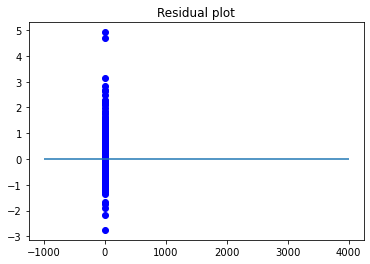

In [147]:
x_plot = plt.scatter(y_predrf, (y_predrf - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=4000)

plt.title('Residual plot')

***

# XGBOOST REGRESSOR

In [148]:
import pandas as pd
import xgboost as xg

In [149]:
#xgb.fit(X_train,y_train,eval_metric='mse')
from sklearn.multioutput import MultiOutputRegressor
multioutputregressor=MultiOutputRegressor(xg.XGBRegressor(objective='reg:squarederror',n_estimators=800,reg_lambda=1,gamma=0,max_depth=20,learning_rate=.5))
MultiOutputRegressor(multioutputregressor.fit(X_train, y_train))


C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\data.py:119: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


MultiOutputRegressor(estimator=MultiOutputRegressor(estimator=XGBRegressor(base_score=None,
                                                                           booster=None,
                                                                           colsample_bylevel=None,
                                                                           colsample_bynode=None,
                                                                           colsample_bytree=None,
                                                                           gamma=0,
                                                                           gpu_id=None,
                                                                           importance_type='gain',
                                                                           interaction_constraints=None,
                                                                           learning_rate=0.5,
                                                                           max_delta_step=None,
                                                                           max_depth=20,
                                                                           min_child_weight=None,
                                                                           missing=nan,
                                                                           monotone_constraints=None,
                                                                           n_estimators=800,
                                                                           n_jobs=None,
                                                                           num_parallel_tree=None,
                                                                           random_state=None,
                                                                           reg_alpha=None,
                                                                           reg_lambda=1,
                                                                           scale_pos_weight=None,
                                                                           subsample=None,
                                                                           tree_method=None,
                                                                           validate_parameters=None,
                                                                           verbosity=None)))

In [157]:
y_pred=multioutputregressor.predict(X_test)


In [158]:
y_pred

array([[ 0.5102602 ,  0.7984247 ,  1.0726006 ],
       [ 0.04877169, -0.05577094, -0.01738922],
       [ 0.0689088 , -0.8753004 , -0.35785213],
       ...,
       [ 1.3586997 ,  1.7757502 ,  0.9716069 ],
       [-0.9406536 , -1.0102715 , -0.09643299],
       [-0.4332576 , -0.40594995, -0.41594097]], dtype=float32)

In [159]:
mse=mean_squared_error(y_test,y_pred)

In [160]:
mse

0.0063671075066879775

In [161]:
print(y_test.shape,len(y_pred))

(15479, 3) 15479


In [162]:
r2_score(y_test,y_pred)

0.9935849846590147

Text(0.5, 1.0, 'Residual plot')

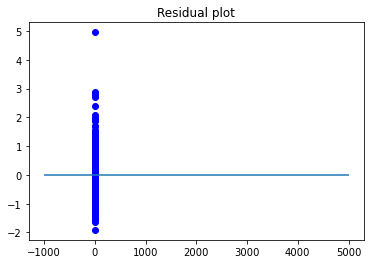

In [163]:
x_plot = plt.scatter(y_pred, (y_pred - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

In [185]:
import pickle
pickle.dump(multioutputregressor,open('C:/Users/ASUS/technocolabs/ML_DEPLOYMENT_MODELS/regression_xgboost.pkl',"wb"))

***
# LINEAR REGRESSION
***

In [164]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

lreg.fit(X_train, y_train)

LinearRegression()

In [165]:
y_predlr = model.predict(X_test)

In [166]:

# model evaluation
print('Model Evaluation for linear regression:')
print('mean_squared_error : ', mean_squared_error(y_test, y_predlr))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, y_predlr, multioutput=[0.4, 0.5, 0.7]))
print('R2_score : ', r2_score(y_test, y_predlr))

Model Evaluation for linear regression:
mean_squared_error :  0.012861336160168164
mean_squared_percentage_error :  0.28216075545795744
R2_score :  0.9870377034769174


its not good model as r2-score is very good(95%). only 95% of variance in targets is explained by our input data. In other words, we’ll have 60% information to make an accurate prediction about its targets(emi,ela,roi).

In [167]:
#calculating coefficients

coeff = pd.DataFrame(X_train.columns)
coeff['Coefficient Estimate'] = pd.Series(lreg.coef_[0])
coeff



,0,Coefficient Estimate
0,Age,-0.002918
1,AppliedAmount,-0.041839
2,Amount,0.778792
3,Interest,0.529620
4,LoanDuration,-0.010367
...,...,...
109,CreditScoreEsMicroL_6,0.022258
110,CreditScoreEsMicroL_7,-0.074139
111,CreditScoreEsMicroL_8,-0.052664
112,CreditScoreEsMicroL_9,0.108201


In [168]:
lreg.coef_

array([[-2.91842096e-03, -4.18392175e-02,  7.78791930e-01,
         5.29620018e-01, -1.03666942e-02,  5.52023117e-03,
         5.21446713e-02, -5.87501426e-03,  2.79298855e-02,
         2.74677971e-04, -1.29474397e-03, -3.32263030e-02,
        -2.28124726e-02,  6.17949908e-02,  2.45412941e-02,
        -1.39138289e-02, -2.30418245e-02, -1.03444706e-02,
        -2.30043250e-02, -8.93746815e-02,  7.09024916e-02,
        -4.42549888e-02,  1.98206039e-02, -2.08860707e-15,
        -3.55393705e-03,  3.14147926e-03, -3.07254222e-14,
        -3.38198171e-02,  4.42883687e-02,  3.57618813e-01,
         3.12907182e-01,  3.13779580e-01,  3.01727851e-01,
        -6.37947407e-03,  9.01487628e-02, -1.93784530e-01,
        -7.49476204e-03,  1.35994681e-01, -1.71387808e-02,
        -4.46272186e-02, -2.96653197e-02,  1.21473059e-02,
        -1.75625798e-02, -1.53021451e-02,  2.79564137e-02,
        -1.51527247e-03,  1.21386070e-01,  1.27568953e-01,
         1.14995823e-01,  5.20187870e-02, -1.18633261e-0

Text(0.5, 1.0, 'Residual plot')

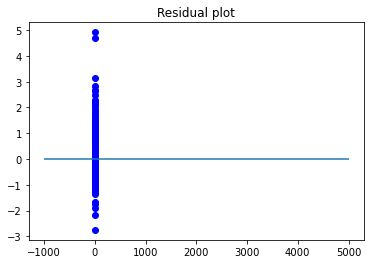

In [169]:
x_plot = plt.scatter(y_predlr, (y_predlr - y_test), c='b')

plt.hlines(y=0, xmin= -1000, xmax=5000)

plt.title('Residual plot')

<AxesSubplot:title={'center':'Modal Coefficients'}>

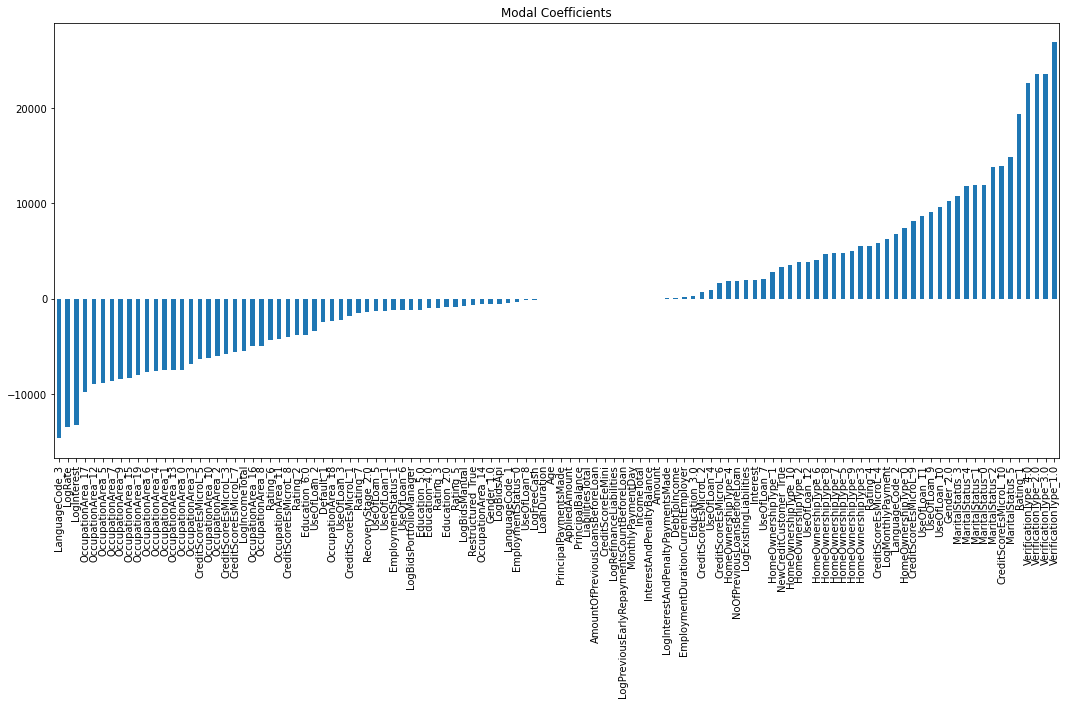

In [74]:
predictors = X_train.columns

coef = pd.Series(lreg.coef_[0],predictors).sort_values()

coef.plot(kind='bar', figsize=(18,8),title='Modal Coefficients')

***

Adjusted R-square
The only drawback of R2 is that if new predictors (X) are added to our model, R2 only increases or remains constant but it never decreases. We can not judge that by increasing complexity of our model, are we making it more accurate?

That is why, we use “Adjusted R-Square”.

The Adjusted R-Square is the modified form of R-Square that has been adjusted for the number of predictors in the model. It incorporates model’s degree of freedom. The adjusted R-Square only increases if the new term improves the model accuracy.

***
# RIDGE REGRESSION

In [170]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge()

ridgeReg.fit(X_train,y_train)

Ridge()

In [171]:
y_predr = ridgeReg.predict(X_test)

In [172]:
# model evaluation
print('Model Evaluation for ridge regression:')
print('mean_squared_error : ', mean_squared_error(y_test, y_predr))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, y_predr, multioutput=[0.4, 0.5, 0.7]))
print('R2_score : ', r2_score(y_test, y_predr))

Model Evaluation for ridge regression:
mean_squared_error :  0.05818373935536536
mean_squared_percentage_error :  0.4919420639208942
R2_score :  0.9413891078010451


In [173]:
from sklearn.model_selection import RandomizedSearchCV

rid_reg = Ridge()

param_dist = {"alpha": list(np.array(range(1,9))*0.25)}

random_search = RandomizedSearchCV(ridgeReg, param_distributions=param_dist)

random_search.fit(X_train, y_train)

rid_preds = random_search.best_estimator_.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [174]:
print('Ridge Regression - Best estimator:')
print('Best Estimator: \n', random_search.best_estimator_)
print('mean_squared_error : ', mean_squared_error(y_test, rid_preds))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, rid_preds, multioutput=[0.3,0.5, 0.7]))
print('R2_score : ', r2_score(y_test, rid_preds))

Ridge Regression - Best estimator:
Best Estimator: 
 Ridge(alpha=0.25)
mean_squared_error :  0.05816539197877788
mean_squared_percentage_error :  0.45728970740591657
R2_score :  0.9414075977514202


# LASSO REGRESSION

In [175]:
from sklearn.linear_model import Lasso

In [176]:
lassoReg = Lasso()

lassoReg.fit(X_train,y_train)

Lasso()

In [177]:
y_predla = lassoReg.predict(X_test)

In [178]:
# model evaluation
print('Model Evaluation for ridge regression:')
print('mean_squared_error : ', mean_squared_error(y_test, y_predla))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, y_predla, multioutput=[0.4, 0.5, 0.7]))
print('R2_score : ', r2_score(y_test, y_predla))

Model Evaluation for ridge regression:
mean_squared_error :  0.9910596884832398
mean_squared_percentage_error :  1.001618174608911
R2_score :  -1.6016807843429366e-05


In [179]:
from sklearn.model_selection import RandomizedSearchCV
lassoReg = Lasso()

param_dist = {"alpha": list(np.array(range(1,9))*0.25)}

random_search = RandomizedSearchCV(lassoReg, param_distributions=param_dist)

random_search.fit(X_train, y_train)

las_preds = random_search.best_estimator_.predict(X_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [180]:
print('lasso Regression - Best estimator:')
print('Best Estimator: \n', random_search.best_estimator_)
print('mean_squared_error : ', mean_squared_error(y_test, las_preds))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, las_preds, multioutput=[0.3,0.5, 0.7]))
print('R2_score : ', r2_score(y_test, las_preds))

lasso Regression - Best estimator:
Best Estimator: 
 Lasso(alpha=0.25)
mean_squared_error :  0.19906139017408964
mean_squared_percentage_error :  0.8706688241222312
R2_score :  0.7993683875258824


# Elasticnet

In [181]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5)

ENreg.fit(X_train,y_train)

el_pred = ENreg.predict(X_test)

In [182]:
# model evaluation
print('Model Evaluation for elasticnet regression:')
print('mean_squared_error : ', mean_squared_error(y_test, el_pred))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, el_pred, multioutput=[0.4, 0.5, 0.7]))
print('R2_score : ', r2_score(y_test, el_pred))

Model Evaluation for elasticnet regression:
mean_squared_error :  0.5878936235907447
mean_squared_percentage_error :  0.9987198624091997
R2_score :  0.40714143456025015


In [183]:
ENreg = ElasticNet()

param_dist = {"alpha": list(np.array(range(1,9))*0.25),"l1_ratio": list(np.array(range(1,5))*0.15)}

random_search = RandomizedSearchCV(ENreg, param_distributions=param_dist)

random_search.fit(X_train, y_train)

en_preds = random_search.best_estimator_.predict(X_test)

In [184]:
print('Elastic Regression - Best estimator:')
print('Best Estimator: \n', random_search.best_estimator_)
print('mean_squared_error : ', mean_squared_error(y_test, en_preds))
print('mean_squared_percentage_error : ', mean_absolute_percentage_error(y_test, en_preds, multioutput=[0.3,0.5, 0.7]))
print('R2_score : ', r2_score(y_test, en_preds))

Elastic Regression - Best estimator:
Best Estimator: 
 ElasticNet(alpha=0.25, l1_ratio=0.6)
mean_squared_error :  0.14523812749154272
mean_squared_percentage_error :  0.6332532291697198
R2_score :  0.853615406681575


# final model

as above we can see that XGBOOST regressor is best model which have 99 % r2_score(.993)

NOTE: after that i will work(working) on pipeline+deployment then go into webapp using streamlit.
if possible best model will change.